**Predicting Loan Payback**

---

https://www.kaggle.com/competitions/playground-series-s5e11/data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [31]:
df_test.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate
count,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000
mean,721278.000000,48233.080193,0.120583,681.037691,15016.753484,12.352323
std,73487.884676,26719.658580,0.068582,55.624118,6922.165182,2.017602
min,593994.000000,6011.770000,0.011000,395.000000,500.050000,3.200000
25%,657636.000000,27950.300000,0.072000,646.000000,10248.580000,10.980000
50%,721278.000000,46528.980000,0.096000,683.000000,15000.220000,12.370000
75%,784920.000000,61149.440000,0.156000,719.000000,18831.460000,13.690000
max,848562.000000,380653.940000,0.627000,849.000000,48959.260000,21.290000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178765 entries, 0 to 178764
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    178765 non-null  int64  
 1   annual_income         178765 non-null  float64
 2   debt_to_income_ratio  178765 non-null  float64
 3   credit_score          178765 non-null  int64  
 4   loan_amount           178765 non-null  float64
 5   interest_rate         178765 non-null  float64
 6   gender                178765 non-null  object 
 7   marital_status        178765 non-null  object 
 8   education_level       178765 non-null  object 
 9   employment_status     178765 non-null  object 
 10  loan_purpose          178765 non-null  object 
 11  grade_subgrade        178764 non-null  object 
 12  loan_paid_back        178764 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 17.7+ MB


In [3]:
df.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,178765.000000,178765.000000,178765.000000,178765.000000,178765.000000,178765.000000,178764.000000
mean,89382.000000,48184.107129,0.120922,680.870590,15023.252942,12.361253,0.797649
std,51605.154773,26698.413095,0.068876,55.475389,6923.539575,2.009284,0.401753
min,0.000000,6002.430000,0.011000,395.000000,500.910000,3.660000,0.000000
25%,44691.000000,27899.730000,0.072000,646.000000,10281.750000,10.990000,1.000000
50%,89382.000000,46557.710000,0.096000,682.000000,15011.150000,12.370000,1.000000
75%,134073.000000,60973.990000,0.157000,719.000000,18861.270000,13.690000,1.000000
max,178764.000000,393381.740000,0.577000,849.000000,48959.950000,20.840000,1.000000


<Axes: >

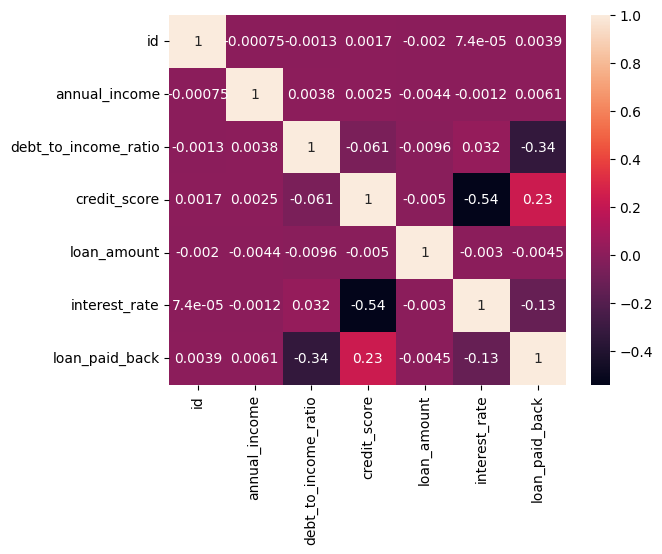

In [5]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [8]:
df.isna().sum()

,0
id,0
annual_income,0
debt_to_income_ratio,0
credit_score,0
loan_amount,0
interest_rate,0
gender,0
marital_status,0
education_level,0
employment_status,0


In [2]:
df.dropna(inplace=True)

In [3]:
df.duplicated().sum()

np.int64(0)

In [28]:
df['loan_paid_back'].value_counts()

,count
loan_paid_back,
1.0,142591
0.0,36173


<Axes: xlabel='count', ylabel='education_level'>

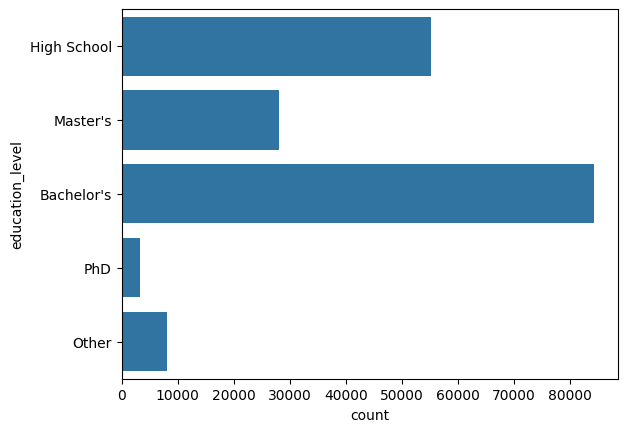

In [12]:
sns.countplot(df['education_level'])

<Axes: xlabel='count', ylabel='employment_status'>

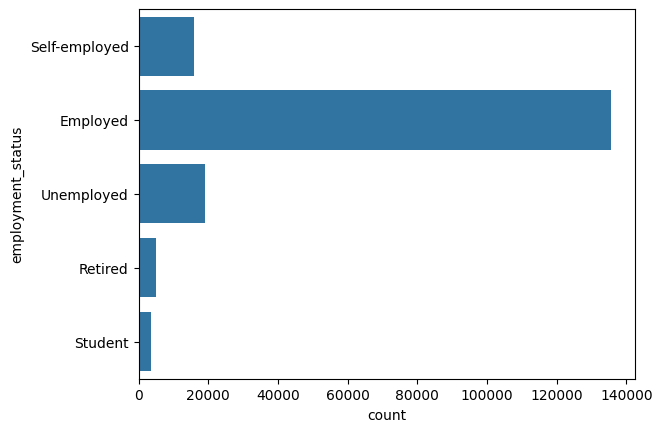

In [13]:
sns.countplot(df['employment_status'])

<Axes: xlabel='count', ylabel='loan_purpose'>

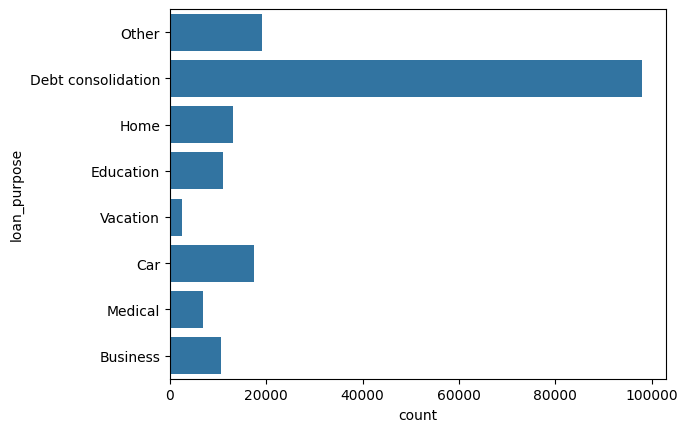

In [14]:
sns.countplot(df['loan_purpose'])

<Axes: xlabel='count', ylabel='grade_subgrade'>

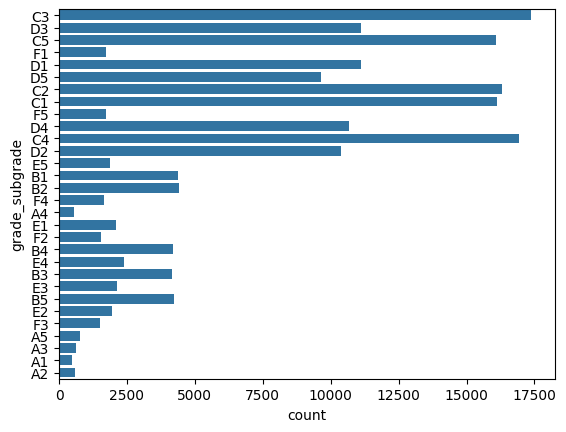

In [15]:
sns.countplot(df['grade_subgrade'])

<Axes: xlabel='count', ylabel='gender'>

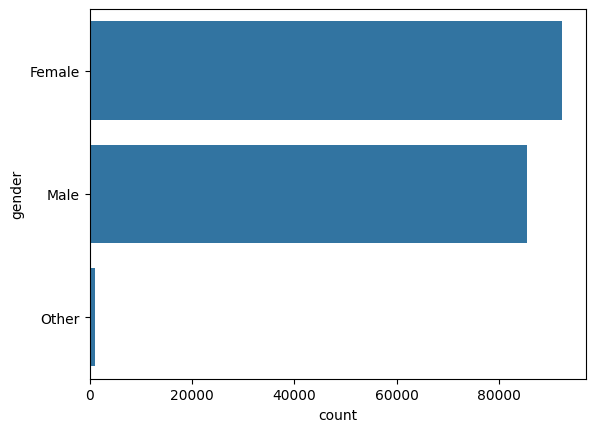

In [16]:
sns.countplot(df['gender'])

<Axes: xlabel='count', ylabel='marital_status'>

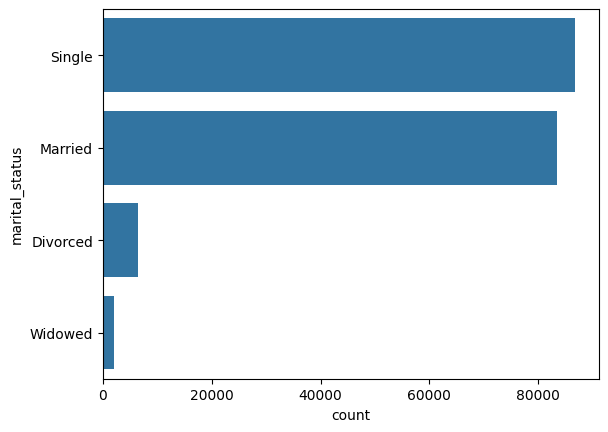

In [17]:
sns.countplot(df['marital_status'])

In [32]:
df.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

transformer = ColumnTransformer([
   ('std_features', StandardScaler(),['annual_income', 'debt_to_income_ratio', 'credit_score','loan_amount', 'interest_rate']),
   ('one_hot_features', OneHotEncoder(handle_unknown='ignore'),['gender', 'marital_status','education_level', 'employment_status', 'loan_purpose']),
   ('ordinal_features', OrdinalEncoder(),['grade_subgrade'])
])

X = df.drop(columns=['loan_paid_back'])
y = df['loan_paid_back']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [35]:
df_test.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate
count,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000
mean,721278.000000,48233.080193,0.120583,681.037691,15016.753484,12.352323
std,73487.884676,26719.658580,0.068582,55.624118,6922.165182,2.017602
min,593994.000000,6011.770000,0.011000,395.000000,500.050000,3.200000
25%,657636.000000,27950.300000,0.072000,646.000000,10248.580000,10.980000
50%,721278.000000,46528.980000,0.096000,683.000000,15000.220000,12.370000
75%,784920.000000,61149.440000,0.156000,719.000000,18831.460000,13.690000
max,848562.000000,380653.940000,0.627000,849.000000,48959.260000,21.290000


In [37]:
X_submission = transformer.transform(df_test)

In [39]:
X_submission.shape

(254569, 31)

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

select = SelectKBest(f_classif).fit(X_train,y_train)
X_new = select.transform(X_train)
X_train

array([[ 0.47956437, -0.50956088,  0.99691868, ...,  0.        ,
         0.        , 13.        ],
       [ 0.2778628 ,  1.08961212,  0.094544  , ...,  0.        ,
         0.        , 14.        ],
       [ 0.13022549, -0.16065041,  1.97148333, ...,  0.        ,
         0.        , 12.        ],
       ...,
       [ 0.36777026, -0.80031961, -0.7536882 , ...,  0.        ,
         0.        , 18.        ],
       [ 0.87582627, -0.18972628, -0.35664334, ...,  0.        ,
         0.        , 15.        ],
       [ 0.97604334,  0.40632911, -1.8906803 , ...,  0.        ,
         0.        , 26.        ]])

In [18]:
select.get_feature_names_out()

array(['x1', 'x2', 'x4', 'x12', 'x17', 'x18', 'x19', 'x20', 'x21', 'x30'],
      dtype=object)

In [35]:
transformer.get_feature_names_out()

array(['std_features__annual_income',
       'std_features__debt_to_income_ratio', 'std_features__credit_score',
       'std_features__loan_amount', 'std_features__interest_rate',
       'one_hot_features__gender_Female', 'one_hot_features__gender_Male',
       'one_hot_features__gender_Other',
       'one_hot_features__marital_status_Divorced',
       'one_hot_features__marital_status_Married',
       'one_hot_features__marital_status_Single',
       'one_hot_features__marital_status_Widowed',
       "one_hot_features__education_level_Bachelor's",
       'one_hot_features__education_level_High School',
       "one_hot_features__education_level_Master's",
       'one_hot_features__education_level_Other',
       'one_hot_features__education_level_PhD',
       'one_hot_features__employment_status_Employed',
       'one_hot_features__employment_status_Retired',
       'one_hot_features__employment_status_Self-employed',
       'one_hot_features__employment_status_Student',
       'one_hot

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

param_grid = {
    'max_depth': [20],
    'n_estimators': [500],
}

rf = RandomForestClassifier(random_state=42)

rd_search = RandomizedSearchCV(rf, param_grid, cv=5, refit=True, scoring='accuracy', random_state=42, verbose=3)
rd_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ....max_depth=20, n_estimators=500;, score=0.903 total time= 7.4min


KeyboardInterrupt: 

Best parameters: {'min_samples_leaf': 2, 'max_depth': 5}
Best score: 0.8804357584770933
Accuracy: 0.8790870696165357
              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71      7235
         1.0       0.93      0.92      0.92     28518

    accuracy                           0.88     35753
   macro avg       0.81      0.83      0.82     35753
weighted avg       0.88      0.88      0.88     35753



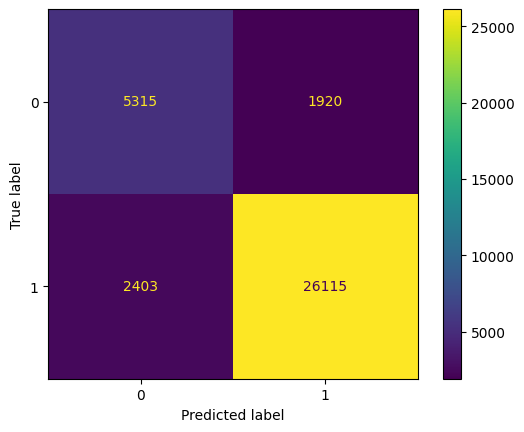

In [47]:
y_pred_rf = rd_search.predict(X_test)

print(f'Best parameters: {rd_search.best_params_}')

print(f'Best score: {rd_search.best_score_}')

print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')

print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# LightGBM

[LightGBM] [Info] Number of positive: 71483, number of negative: 18253
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1354
[LightGBM] [Info] Number of data points in the train set: 89736, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.796592 -> initscore=1.365130
[LightGBM] [Info] Start training from score 1.365130
Accuracy: 0.9027412525072431
              precision    recall  f1-score   support

         0.0       0.88      0.61      0.72      4564
         1.0       0.91      0.98      0.94     17871

    accuracy                           0.90     22435
   macro avg       0.89      0.79      0.83     22435
weighted avg       0.90      0.90      0.90     22435



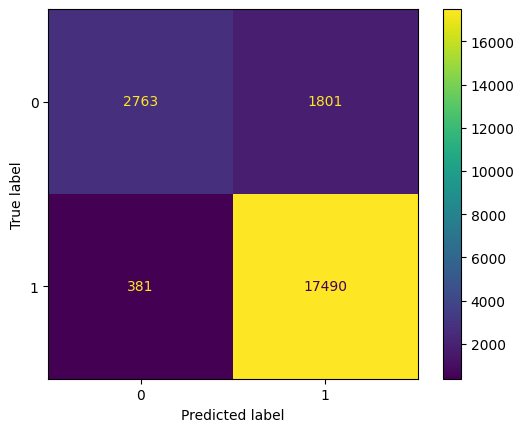

In [16]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

lgbm = lgb.LGBMClassifier(n_estimators=500, max_depth=12, random_state=42)

lgbm.fit(X_train, y_train)

y_pred_lgb = lgbm.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lgb)}')

print(classification_report(y_test, y_pred_lgb))

cm = confusion_matrix(y_test, y_pred_lgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [17]:
fpr, tpr, _ = roc_curve(y_test, lgbm.predict_proba(X_test)[:, 1])
print("AUC:", auc(fpr, tpr))

AUC: 0.9153146851294929


# XGBoost

[11:39:25] ======== Monitor (0): HostSketchContainer ========
[11:39:25] AllReduce: 0.029252s, 1 calls @ 29252us

[11:39:25] MakeCuts: 0.031278s, 1 calls @ 31278us

[11:39:25] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (89736, 31, 2781816).
[11:39:25] DEBUG: /workspace/src/gbm/gbtree.cc:127: Using tree method: 3
[11:43:44] ======== Monitor (0): GBTree ========
[11:43:44] BoostNewTrees: 241.385s, 10000 calls @ 241385475us

[11:43:44] CommitModel: 0.016027s, 10000 calls @ 16027us

[11:43:44] ======== Monitor (0): HistUpdater ========
[11:43:44] BuildHistogram: 91.9873s, 49998 calls @ 91987283us

[11:43:44] EvaluateSplits: 12.5324s, 59998 calls @ 12532358us

[11:43:44] InitData: 3.13702s, 10000 calls @ 3137022us

[11:43:44] InitRoot: 76.5509s, 10000 calls @ 76550913us

[11:43:44] LeafPartition: 0.003505s, 10000 calls @ 3505us

[11:43:44] UpdatePosition: 44.2429s, 59995 calls @ 44242873us

[11:43:44] UpdatePredictionCache: 3.11397s, 100

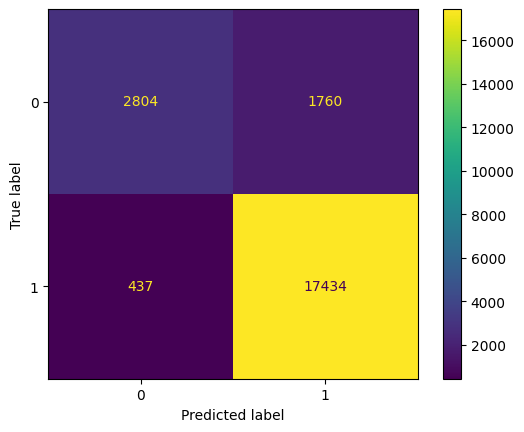

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        learning_rate=0.01,
        max_depth=6,
        min_child_weight=3,
        colsample_bytree=0.3,
        subsample=0.6,
        reg_alpha=0.5,
        reg_lambda=2.0,
        n_estimators=10000,
        random_state=42,
        n_jobs=-1,
        tree_method='hist',
        verbosity=3
    )

model.fit(X_train,y_train)

y_pred_xgb = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb)}')

print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [15]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
print("AUC:", auc(fpr, tpr))

AUC: 0.9141572703998874


# Stacking Classifier

[11:45:37] ======== Monitor (0): HostSketchContainer ========
[11:45:37] AllReduce: 0.023824s, 1 calls @ 23824us

[11:45:37] MakeCuts: 0.028774s, 1 calls @ 28774us

[11:45:37] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (89736, 31, 2781816).
[11:45:37] DEBUG: /workspace/src/gbm/gbtree.cc:127: Using tree method: 3
[11:47:50] ======== Monitor (0): GBTree ========
[11:47:50] BoostNewTrees: 117.847s, 10000 calls @ 117846617us

[11:47:50] CommitModel: 0.01537s, 10000 calls @ 15370us

[11:47:50] ======== Monitor (0): HistUpdater ========
[11:47:50] BuildHistogram: 40.4057s, 49998 calls @ 40405747us

[11:47:50] EvaluateSplits: 6.18176s, 59998 calls @ 6181763us

[11:47:50] InitData: 1.82332s, 10000 calls @ 1823316us

[11:47:50] InitRoot: 30.712s, 10000 calls @ 30711992us

[11:47:50] LeafPartition: 0.003359s, 10000 calls @ 3359us

[11:47:50] UpdatePosition: 28.4001s, 59995 calls @ 28400070us

[11:47:50] UpdatePredictionCache: 1.95013s, 10000 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.6min finished


[LightGBM] [Info] Number of positive: 57186, number of negative: 14602
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1353
[LightGBM] [Info] Number of data points in the train set: 71788, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.796596 -> initscore=1.365151
[LightGBM] [Info] Start training from score 1.365151
[LightGBM] [Info] Number of positive: 57186, number of negative: 14603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1353
[LightGBM] [Info] Number of data points in the train set: 71789, number of used features: 31
[LightGBM] [Info] [b

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.4s finished


[11:57:46] DEBUG: /workspace/src/gbm/gbtree.cc:127: Using tree method: 3
Accuracy: 0.9041230220637397
              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73      4564
         1.0       0.91      0.98      0.94     17871

    accuracy                           0.90     22435
   macro avg       0.89      0.80      0.83     22435
weighted avg       0.90      0.90      0.90     22435



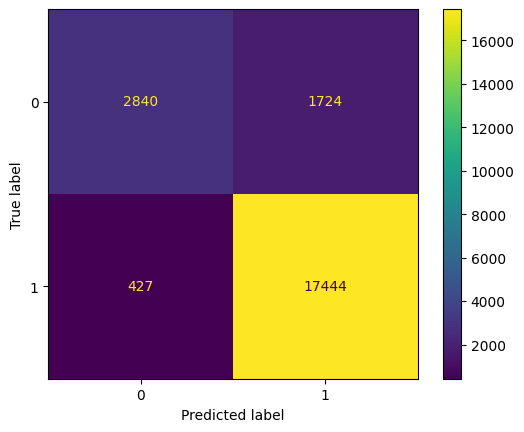

AUC: 0.9165413528672303


In [18]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import lightgbm as lgb

base_learners = [
    ('xgb', model),
    ('lgb', lgbm),
]

meta_clf = LogisticRegression(random_state=42)

stacking_clf = StackingClassifier(estimators=base_learners,final_estimator=meta_clf,cv=5,verbose=3)

stacking_clf.fit(X_train, y_train)

y_pred_stacking = stacking_clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_stacking )}')

print(classification_report(y_test, y_pred_stacking ))

cm = confusion_matrix(y_test, y_pred_stacking )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

fpr, tpr, _ = roc_curve(y_test, stacking_clf.predict_proba(X_test)[:, 1])
print("AUC:", auc(fpr, tpr))

In [40]:
y_submission = stacking_clf.predict_proba(X_submission)

In [41]:
y_submission.shape

(254569, 2)

In [42]:
submission = pd.DataFrame({'id': df_test['id'].values, 'loan_paid_back': y_submission[:, 1]})
submission.describe()

,id,loan_paid_back
count,254569.000000,254569.000000
mean,721278.000000,0.797866
std,73487.884676,0.294444
min,593994.000000,0.030889
25%,657636.000000,0.853129
50%,721278.000000,0.937872
75%,784920.000000,0.953715
max,848562.000000,0.958942


In [43]:
submission.to_csv('submission.csv',index=False)